In [1]:
import struct

# see CDAS git /Raid/src/Utils/CL/cl_msg_unknown_pack.h
def read_package(f) -> dict:

    package = {}

    # pack Header
    LsId = int.from_bytes(f.read(2), byteorder='little')
    n_packs = int.from_bytes(f.read(2), byteorder='little')
    timestamp_sec = int.from_bytes(f.read(4), byteorder='little')
    timestamp_nsec = int.from_bytes(f.read(4), byteorder='little')
    total_size = int.from_bytes(f.read(4), byteorder='little')
    rv = LsId, None

    for i in range(n_packs):

        # header i
        type = int.from_bytes(f.read(4), byteorder='little')
        version = int.from_bytes(f.read(4), byteorder='little')
        size = int.from_bytes(f.read(4), byteorder='little')
        data = f.read(size)

        # package[str(i)] = {'type': type,
        #                 'version': version,
        #                 'size': size,
        #                 'data': data}

        # only return the data we're interested in
        if type == 8 and version == 2:
            rv = LsId, data
    
    return rv

# before_official_daq = [] 
# with open('/home/filip/Desktop/monitoring_packs/monit_2024_12_05.packs.nobackup', 'rb') as f:
#     while f.read(8) == b'!monit!!':
#         before_official_daq.append(read_package(f))

# official_daq = [] 
# with open('/home/filip/Desktop/monitoring_packs/monit_2024_12_06.packs.nobackup', 'rb') as f:
#     while f.read(8) == b'!monit!!':
#         official_daq.append(read_package(f)) 

/tmp/ipykernel_6284/3168553837.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=f"{id = }", loc='center right')


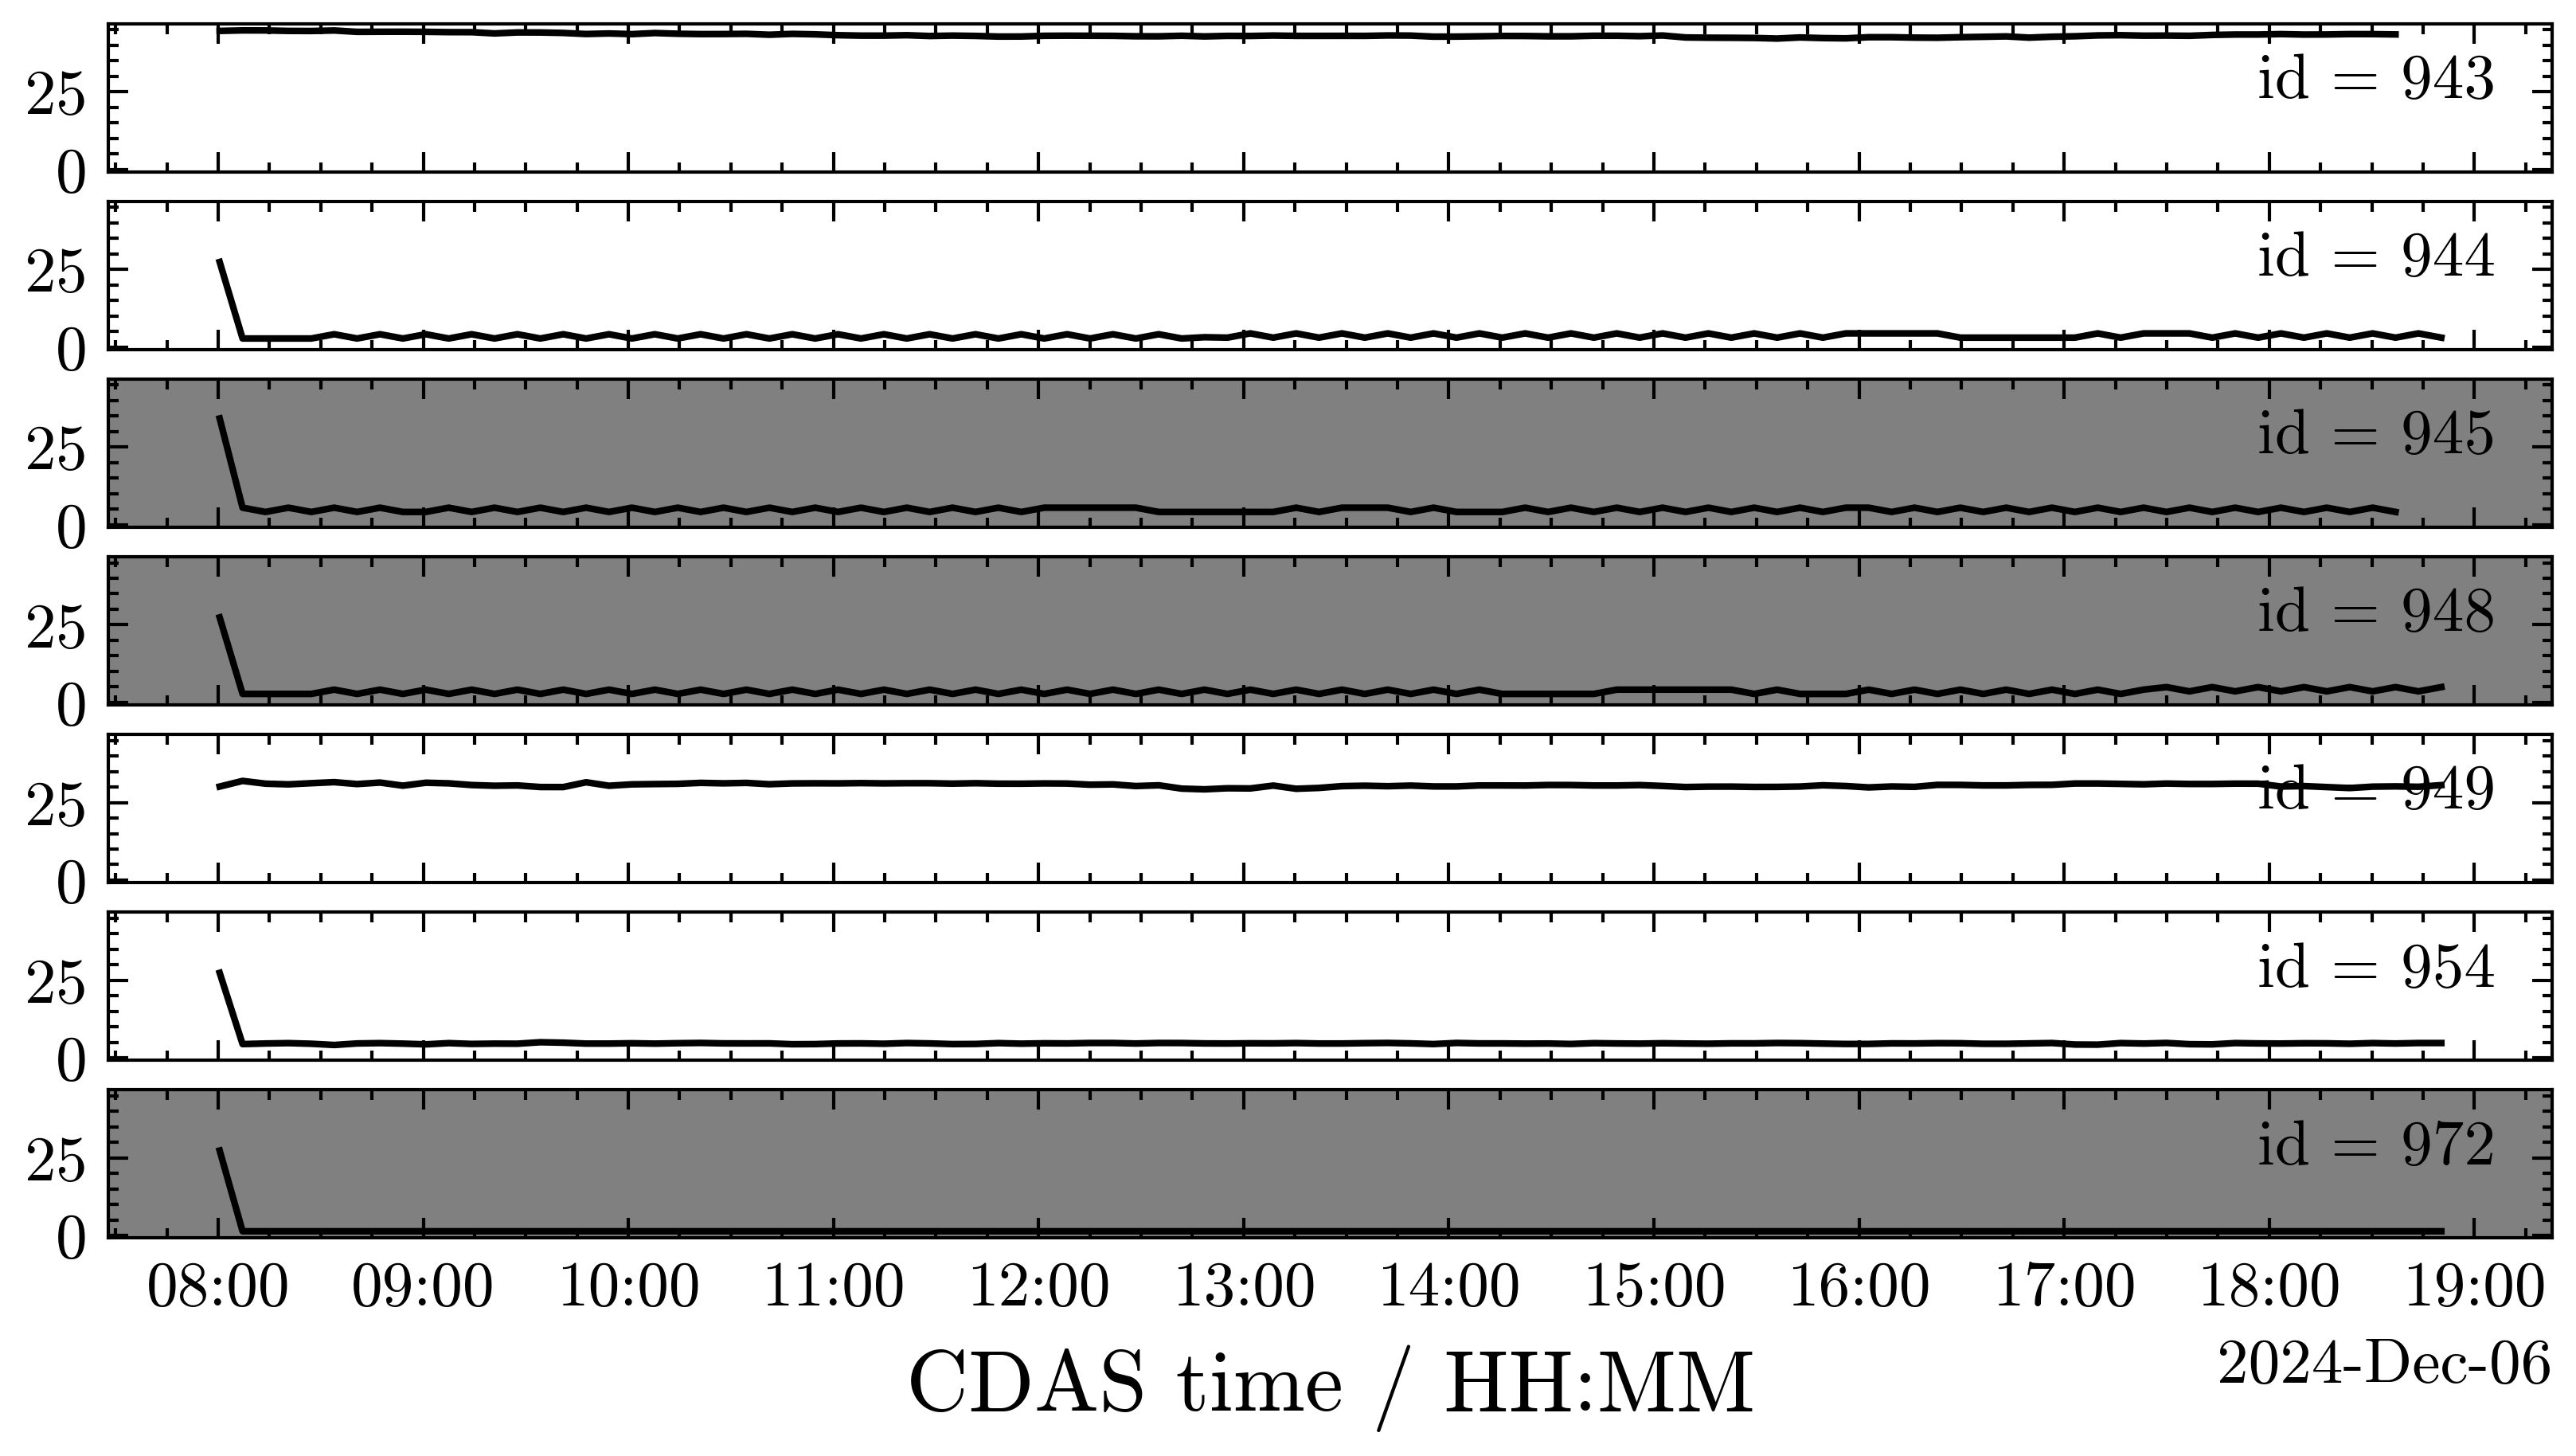

In [ ]:
from utils.binaries import *
from utils.plotting import *
from datetime import datetime
import matplotlib.dates as mdates

start_ack = datetime.strptime("Dec 06 08:00:27 2024", "%b %d %H:%M:%S %Y").timestamp()  # from IkLog

fig, axes = plt.subplots(7, 1, sharex=True, sharey=True)

LsId = [943, 944, 945, 948, 949, 954, 972]
noSSD = [948, 945, 972]
peaks = {id: [] for id in LsId}

convert = lambda d: [struct.unpack('d', d[i:i+8])[0] for i in range(0, len(d), 8)]

for e in official_daq:
    if e[0] == 136: continue
    elif e[1] is None: peaks[e[0]]; continue
    peaks[e[0]].append(convert(e[1]))

for (id, val), ax in zip(peaks.items(), axes):
    # for i in range(4):
    #    ax.plot(range(len(val)), np.array(val)[:, i], label=i)

    if id in noSSD: ax.set_facecolor('#808080')
    ax.plot(plot.to_datetime(start_ack + 402 * np.arange(len(val))), np.array(val)[:, 3]*1.17, ls='solid', marker='none')
    ax.legend(title=f"{id = }", loc='center right')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)

_ = ax.set_xlabel("CDAS time / HH:MM")

In [2]:
from utils.Auger.SD import Monit
import struct

official_daq = []
for day in []:
    try:
        with open(f'/home/filip/Desktop/monitoring_packs/monit_2024_12_{day:02}.packs.nobackup', 'rb') as f:
            while f.read(8) == b'!monit!!':
                official_daq.append(read_package(f))

    except FileNotFoundError as e: print(e)

monit = Monit(2024, 12, range(6, 12))

23:00:03 (  +54.9s) [INFO   ] -- import logging
23:00:04 (  +129ms) [INFO   ] -- import numpy as np
23:00:04 (    +7ms) [INFO   ] -- import uncertainties
23:00:04 (  +331ms) [INFO   ] -- import pandas as pd
23:00:04 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
23:00:04 (    +2ms) [INFO   ] -- import binaries.tools as tools
23:00:05 (  +934ms) [INFO   ] -- import matplotlib.pyplot as plt
23:00:05 (   +39ms) [INFO   ] -- import seaborn as so
23:00:05 (    +3ms) [INFO   ] -- import plotting.tools as plot
23:00:05 (    +8ms) [DEBUG  ] -- font size set to 9.5
23:00:05 (    +1ms) [DEBUG  ] -- label size set to 13.0
23:00:05 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
23:00:05 (    +1ms) [DEBUG  ] -- markersize set to 2.0
23:00:05 (    +2ms) [DEBUG  ] -- usetex set to False
23:00:05 (  +212ms) [ERROR  ] -- I cannot find the monit file for 2024-12-06 !!!


FileNotFoundError: mc_2024_12_06_00h00.root not found in any data path you've specified

In [22]:
from utils.Auger.SD import Monit

In [ ]:
monit = Monit('/home/filip/Desktop/monitoring_packs/mc_2024_12_06_00h00.root')
monit_interval = np.mean(np.diff(monit('fTime', 945)))

In [ ]:
print(monit_interval)